## **Practice Generalization in KNN & Decision Tree**

## **Import Libraries**

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## **1. Load Dataset**

In [9]:
df = pd.read_csv('titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [10]:
# Check Where missing value
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
# Since we're only using  Features: 'pclass', 'sex', 'age', 'fare'
# other missing value doesn't need drop
df = df.dropna(subset=['age'])

In [12]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## **Define X and y**

In [13]:
X = df[['pclass', 'sex', 'age', 'fare']]
y = df['survived']

In [14]:
X.isna().sum()

pclass    0
sex       0
age       0
fare      0
dtype: int64

In [15]:
y.isna().sum()

0

In [16]:
X = pd.get_dummies(X, columns=['sex'], drop_first=True)
X

,pclass,age,fare,sex_male
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
885,3,39.0,29.1250,0
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
889,1,26.0,30.0000,1


# **2. Model Complexity in KNN**

## **Data splitting**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify=y,# is used to keep the proportion of each class in accordance with the overall data
    test_size = 0.2, # size from test set
    random_state = 42  # is used so that the resulting output remains the same even if it is run repeatedly
    )

## **Scaling**

In [18]:
scaler = MinMaxScaler()
scaler.fit(X_train) # preprocess fit, applied only to training data
X_train_scaled = scaler.transform(X_train) # transform data X_train
X_test_scaled = scaler.transform(X_test) # transform data x_test

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train) # model fit
y_predict_class = knn.predict(X_test_scaled) # model predict

In [20]:
print('Model accuracy in test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy in test dataset: 0.7972027972027972


In [21]:
# Find the best k
k = range(1, 150, 2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)

    y_predict_train = knn.predict(X_train_scaled)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))

    y_predict_test = knn.predict(X_test_scaled)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_accuracies.append(acc_score)

    if score < acc_score:
        score = acc_score
        best_k = i

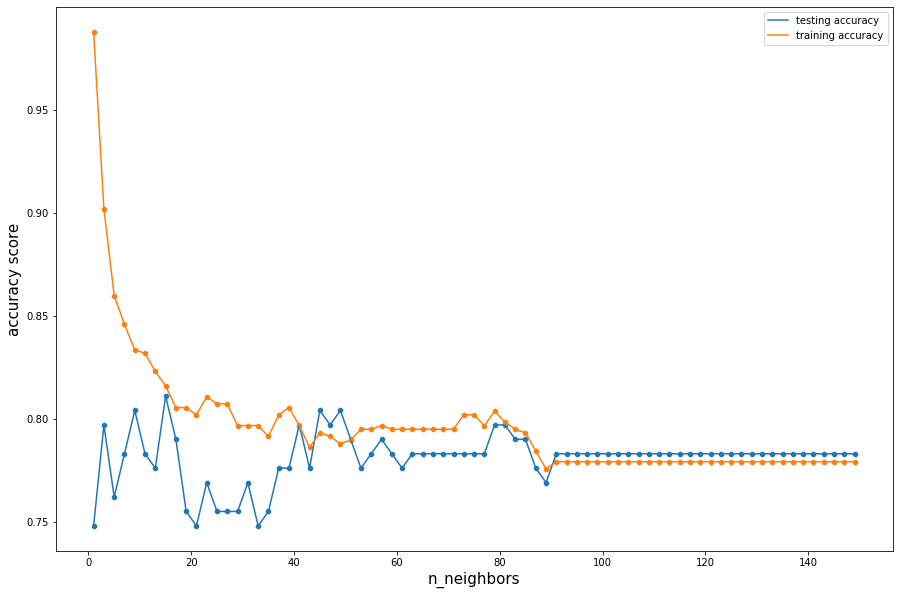

In [22]:
# Plot the accuracies result
plt.figure(figsize=(15, 10))
sns.lineplot(k, testing_accuracies)
sns.scatterplot(k, testing_accuracies)
sns.lineplot(k, training_accuracies)
sns.scatterplot(k, training_accuracies)
plt.legend(['testing accuracy', 'training accuracy'])
plt.xlabel('n_neighbors', size=15)
plt.ylabel('accuracy score', size=15);

In [37]:
# The best K with its score
print('Factpr Best K=', best_k)
print('Best accuracy =', score*100,'%')

Factpr Best K= 15
Best accuracy = 82.51748251748252 %


## **Interpretation**

- When K = 1, the accuracy value of the training set = 100%. This is because when K = 1, the model estimates the probability based on only one sample, namely the nearest neighbor, which the data itself can choose as the closest. This is what causes the error at K = 1 to be 0.

- K = 1 is very sensitive to various distortions, such as noise and outliers, so the accuracy value in the test set with K = 1 must be far below the training accuracy value. Increasing the value of K can reduce the effect of this distortion (related to the decision boundary).
<br><br>

- The best K is 15, it can be seen on the plot that the highest test data accuracy is obtained at K = 15. From K exceeding 15, the accuracy value tends to fluctuate and there is a downward trend, and tends to be underfitting.

# **3. Model Complexity in Decision Tree**

## **Minimum samples split**

In [25]:
split = range(2, 150)
testing_accuracy = []
training_accuracy = []
score = 0

for i in split:
    tree = DecisionTreeClassifier(min_samples_split=i, criterion='entropy')
    tree.fit(X_train, y_train)
    
    y_predict_train = tree.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = tree.predict(X_test)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        best_split = i
        score = acc_score

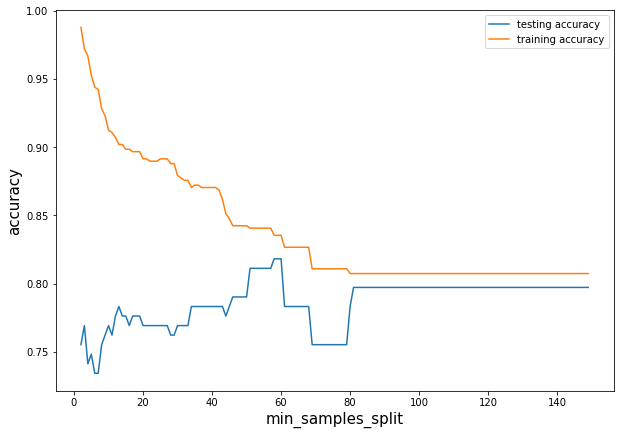

In [26]:
plt.figure(figsize=(10,7))
sns.lineplot(split, testing_accuracy)
sns.lineplot(split, training_accuracy)
plt.legend(['testing accuracy', 'training accuracy'])
plt.xlabel('min_samples_split', size=15)
plt.ylabel('accuracy', size=15);

In [36]:
print('Best Split =', best_split)
print('Best Accuracy =', score*100,'%')

Best Split = 58
Best Accuracy = 82.51748251748252 %


## **Interpretation**

- Minimum samples split is the minimum number of samples required to create a new split on the internal node.
- For example, if min_samples_split = 5, and there are 7 samples on the internal node, then split can be done.
<br><br>

- The best min_samples_split = 58, that means, a minimum of 58 samples is needed to be able to do a new split on the internal node.
- Too low a value of min_sample_split causes a tendency for overfitting, whereas if the value of min_sample_split is much greater than the optimal value (> 80), it causes underfitting.

## **Minimum samples leaf**

In [29]:
leaf = range(1, 150)
testing_accuracy = []
training_accuracy = []
score = 0

for i in leaf:
    tree = DecisionTreeClassifier(min_samples_leaf=i, criterion='entropy')
    tree.fit(X_train, y_train)
    
    y_predict_train = tree.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = tree.predict(X_test)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        best_leaf = i
        score = acc_score

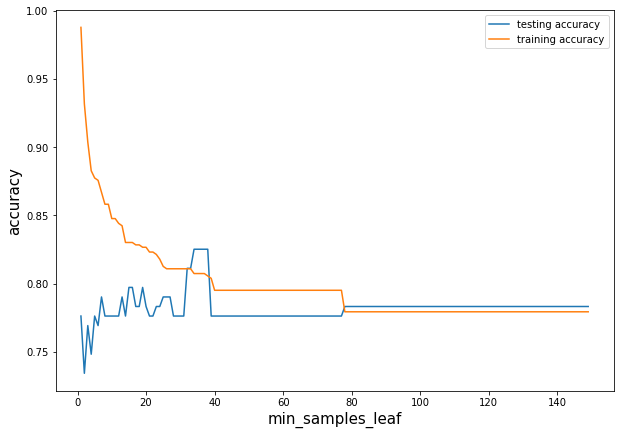

In [30]:
plt.figure(figsize=(10,7))
sns.lineplot(leaf, testing_accuracy)
sns.lineplot(leaf, training_accuracy)
plt.legend(['testing accuracy', 'training accuracy'])
plt.xlabel('min_samples_leaf', size=15)
plt.ylabel('accuracy', size=15);

In [35]:
print('Best leaf =', best_leaf)
print('Accuracy =', (score*100),'%')

Best leaf = 34
Accuracy = 82.51748251748252 %


## **Interpretation**

- Minimum samples leaf is the minimum number of samples needed to be able to form one leaf.
- For example, if the last split resulted in 2 leaf nodes, the first with 2 samples, and the second with 6 samples. If min_samples_leaf = 3, then splitting will not be possible because there is one node that only has 2 samples, even though the internal node as a whole has 8 samples.
<br><br>

- The best min_samples_leaf value = 34. That means, the minimum number of samples needed to be able to split and form one leaf is 34. If the remaining sample before splitting is less than 34, then the next splitting cannot be done. It can be seen in the plot, min_samples_leaf = 34 indeed has the highest accuracy value on the test data.
- There is an overfitting of the min_samples_leaf value < 30, while the min_samples_leaf > 40 indicates a flat trend.
- Overfitting means that the model cannot generalize the new data well, so the accuracy in the test set is much smaller than the training set. This could be because the model is too complex.